In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Question 2a(constant Diffusion)

In [2]:
#set up system configuration

D = 1 # diffusivity # m/s^2
L = 1 # Legth of the system # m
t_stop = 1.0 # total time for the simulation # in sec # select so that saturation is reached

nn = 101 # Number of mesh points
dx = L/nn # the grid space in x direction # depends on L and nn
dt = 1/100000 # select according to strability criteria

alpha = D*dt/(dx**2) # simulation constant

# setup simulations variables

C_old = np.zeros(nn) # Concentration at time t
C_new = np.zeros(nn) # Concentartion at time t+1
b = np.zeros(nn) # b vector in A.X=b equation

xArray=np.linspace(0,L,nn)
Concentartions = [] # save concentration after certian time for plotting at the end
t_array = []
# setup initial conditions

time = 0
a = int(nn/4)
C_old[a+1:3*a+1] = 1
Concentartions.append(C_old)
t_array.append(time)

In [3]:

#function to do CG
def conjugateGradient(AX,x,b,alpha,tol=1.0e-4): 
    r =g= b - AX(x, alpha)
    numIter=0
    while math.sqrt(np.dot(r,r))>tol:
        u = AX(g,alpha)
        alpha_CG = np.dot(g,r)/np.dot(g,u)
        x = x + alpha_CG*g
        r= b - AX(x, alpha)
        beta = -np.dot(r,u)/np.dot(g,u)
        g=r+beta*g
        numIter=numIter+1
        #print (math.sqrt(np.dot(r,r)))
    return x,numIter

#function that return A.X
def Ax(v, alpha):
    m = len(v)
    Ax = np.zeros(m)

    #Boundary Conditions
    Ax[0] = v[0] - v[1]
    Ax[m-1] = v[m-1] - v[m-2]

    #remaining points
    Ax[1:m-1]=(1.0+2.0*alpha)*v[1:m-1]-alpha*v[2:m]-alpha*v[0:m-2]
    
    return Ax


In [4]:
# Run the simulation

# start a loop over time
num_iter = 0
while time < t_stop:
    time += dt
    num_iter += 1

    b = np.copy(C_old)
    #Neuman Bcs
    b[0] = 0
    b[nn-1] = 0
    
    C_new,numIter = conjugateGradient(Ax,C_old,b,alpha)
    
    # save the concentaration at required time steps
    if  num_iter%500 == 0: # save every 1000th step
        Concentartions.append(C_old)
        t_array.append(time)
        #print(num_iter)
    
    # update old C with new C for next loop
    C_old = np.copy(C_new)
Concentartions.append(C_old)
t_array.append(time)
Concentartions_const_D = np.copy(np.array(Concentartions))
t_array_const_D = np.copy(t_array)

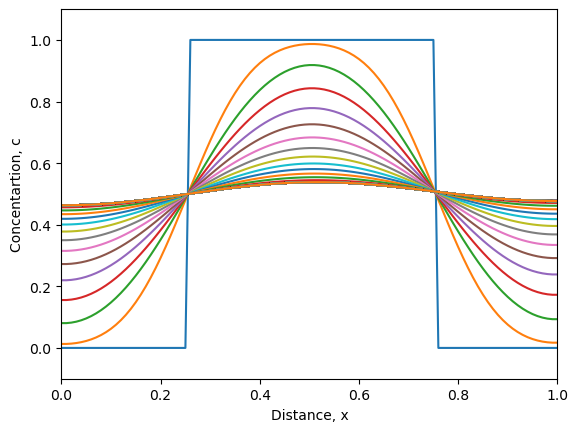

In [5]:
# plot data

for i in Concentartions:
    plt.plot(xArray, i)

#make the plot pretty
plt.xlim(0,1)
plt.ylim(-0.1, 1.1)
plt.xlabel("Distance, x")
plt.ylabel("Concentartion, c")
plt.show()

In [6]:
Concentartions[-1]

array([0.46312189, 0.4631365 , 0.4632943 , 0.46359468, 0.46403649,
       0.46461801, 0.465337  , 0.4661907 , 0.4671758 , 0.46828852,
       0.46952455, 0.47087914, 0.47234707, 0.47392269, 0.47559994,
       0.47737235, 0.47923312, 0.48117509, 0.48319081, 0.48527255,
       0.48741231, 0.48960191, 0.49183295, 0.49409691, 0.49638515,
       0.49868892, 0.50099946, 0.50330798, 0.50560569, 0.5078839 ,
       0.51013399, 0.51234745, 0.51451595, 0.51663134, 0.51868569,
       0.52067135, 0.52258092, 0.52440733, 0.52614387, 0.52778415,
       0.52932223, 0.53075253, 0.53206996, 0.53326986, 0.53434804,
       0.53530082, 0.53612502, 0.53681797, 0.53737753, 0.53780212,
       0.53809067, 0.53824268, 0.53825819, 0.53813777, 0.53788256,
       0.53749423, 0.53697497, 0.53632751, 0.53555507, 0.5346614 ,
       0.53365069, 0.53252762, 0.53129732, 0.52996533, 0.52853758,
       0.52702041, 0.52542047, 0.52374478, 0.52200061, 0.52019552,
       0.51833729, 0.51643392, 0.51449357, 0.51252453, 0.51053

# Question 2b(Non-constant Diffusion)

In [7]:
#set up system configuration

L = 1 # Legth of the system # m
t_stop = 1.0 # total time for the simulation # in sec # select so that saturation is reached

nn = 100 # Number of mesh points
dx = L/nn # the grid space in x direction # depends on L and nn
dt = 1/100000 # select according to strability criteria

beta = dt/(dx**2) # simulation constant

# setup simulations variables

C_old = np.zeros(nn) # Concentration at time t
C_new = np.zeros(nn) # Concentartion at time t+1
b = np.zeros(nn) # b vector in A.X=b equation

xArray=np.linspace(0,L,nn)

Concentartions = [] # save concentration after certian time for plotting at the end
t_array = []
#D = np.ones(nn) # diffusivity # m/s^2
D = 1.1 - xArray**2 # diffusivity is now an array

# setup initial conditions

time = 0
a = int(nn/4)
C_old[a+1:3*a+1] = 1
Concentartions.append(C_old)
t_array.append(time)

In [8]:

#function to do CG
def conjugateGradient(AX,x,b,D,beta,tol=1.0e-4): 
    r =g= b - AX(x, D, beta)
    numIter=0
    while math.sqrt(np.dot(r,r))>tol:
        u = AX(g, D, beta)
        alpha_CG = np.dot(g,r)/np.dot(g,u)
        x = x + alpha_CG*g
        r= b - AX(x, D, beta)
        beta_CG = -np.dot(r,u)/np.dot(g,u)
        g=r+beta_CG*g
        numIter=numIter+1
        #print (math.sqrt(np.dot(r,r)))
    return x,numIter

#function that return A.X
def Ax(v, D, beta):
    m = len(v)
    Ax = np.zeros(m)

    #Boundary Conditions
    Ax[0] = v[0] - v[1]
    Ax[m-1] = v[m-1] - v[m-2]

    #remaining points
    Ax[1:m-1]=(1.0+beta*D[1:m-1]+beta*D[2:m])*v[1:m-1]- beta*D[2:m]*v[2:m] - beta*D[1:m-1]*v[0:m-2]
    
    return Ax

#function to define flux
def Flux(Conc, D, dx):
    nn = len(Conc)
    flux = np.zeros(nn)
    flux[0:nn-1] = D[0:nn-1] * (Conc[0:nn-1] - Conc[1:nn]) / nn
    return flux


In [9]:
# Run the simulation

# start a loop over time
num_iter = 0
while time < t_stop:
    time += dt
    num_iter += 1

    b = np.copy(C_old)
    #Neuman Bcs
    b[0] = 0
    b[nn-1] = 0
    
    C_new,numIter = conjugateGradient(Ax,C_old,b,D,beta)
    
    # save the concentaration at required time steps
    if  num_iter%500 == 0: # save every 1000th step
        Concentartions.append(C_old)
        t_array.append(time)
    
    # update old C with new C for next loop
    C_old = np.copy(C_new)

Concentartions.append(C_old)
t_array.append(time)

Concentartions = np.array(Concentartions)
t_array = np.array(t_array)

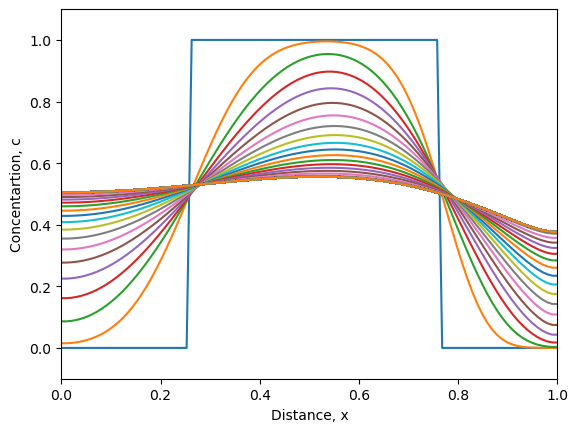

In [10]:
# plot data

for i in Concentartions:
    plt.plot(xArray, i)

#make the plot pretty
plt.xlim(0,1)
plt.ylim(-0.1, 1.1)
plt.xlabel("Distance, x")
plt.ylabel("Concentartion, c")
plt.show()

In [11]:
max(abs(Flux(Concentartions[5], D, dx)))

0.00015358706925213352

# Question 2c: plots

In [12]:
np.shape(Concentartions)
#np.shape(xArray)
np.shape(t_array_const_D)

(202,)

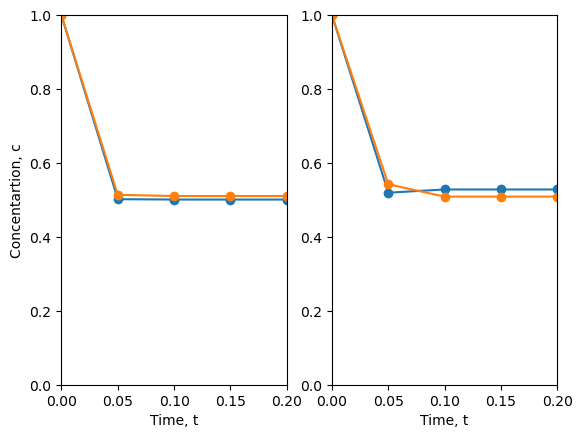

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(t_array_const_D[::10], Concentartions_const_D[:,26][::10], '-o', color = "C0", label = "const D")
ax1.plot(t_array_const_D[::10], Concentartions_const_D[:,74][::10], '-o', color = "C1", label = "con-const D")

ax2.plot(t_array[::10], Concentartions[:,26][::10], '-o', color = "C0", label = "const D")
ax2.plot(t_array[::10], Concentartions[:,74][::10], '-o', color = "C1", label = "con-const D")

#make the plot pretty
ax1.set_ylim(0,1)
ax2.set_ylim(0, 1)
ax1.set_xlim(0,.2)
ax2.set_xlim(0, .2)
ax1.set_xlabel("Time, t")
ax2.set_xlabel("Time, t")
ax1.set_ylabel("Concentartion, c")
plt.show()